## Real world analysis
---

Now we will be learning how to handle different senarios and do analysis based on the real world dataset

In [2]:
# now importing stuffs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's get started by importing Bitcoin and Ether data:

In [3]:
# importing the dataset
df = pd.read_csv(
    "data/btc-eth-prices-outliers.csv",
    index_col = 0, # making col 0 as index
    parse_dates = True # parsing date
)
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


In [4]:
# checking only first 5 rows of the dataset
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


And now we can run a simple visualization:

<Axes: xlabel='Timestamp'>

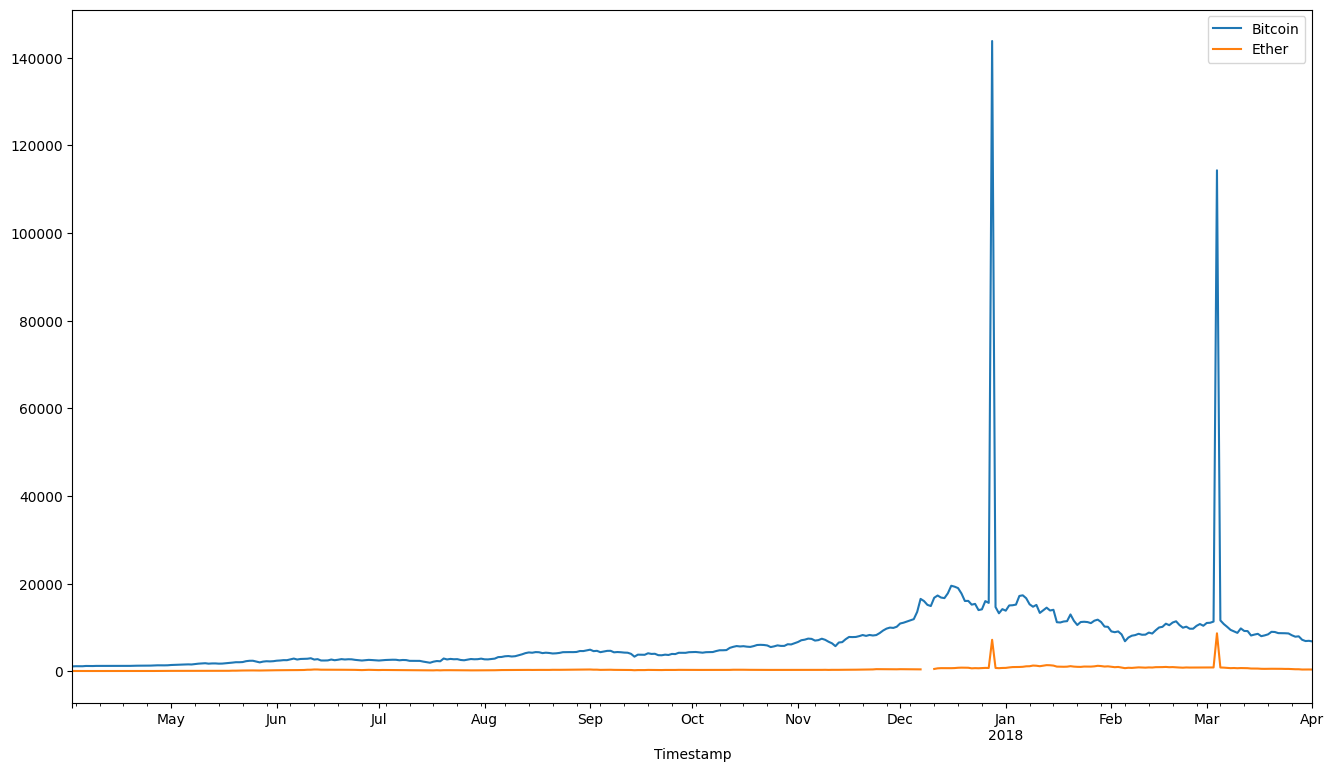

In [5]:
df.plot(figsize = (16,9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

<Axes: xlabel='Timestamp'>

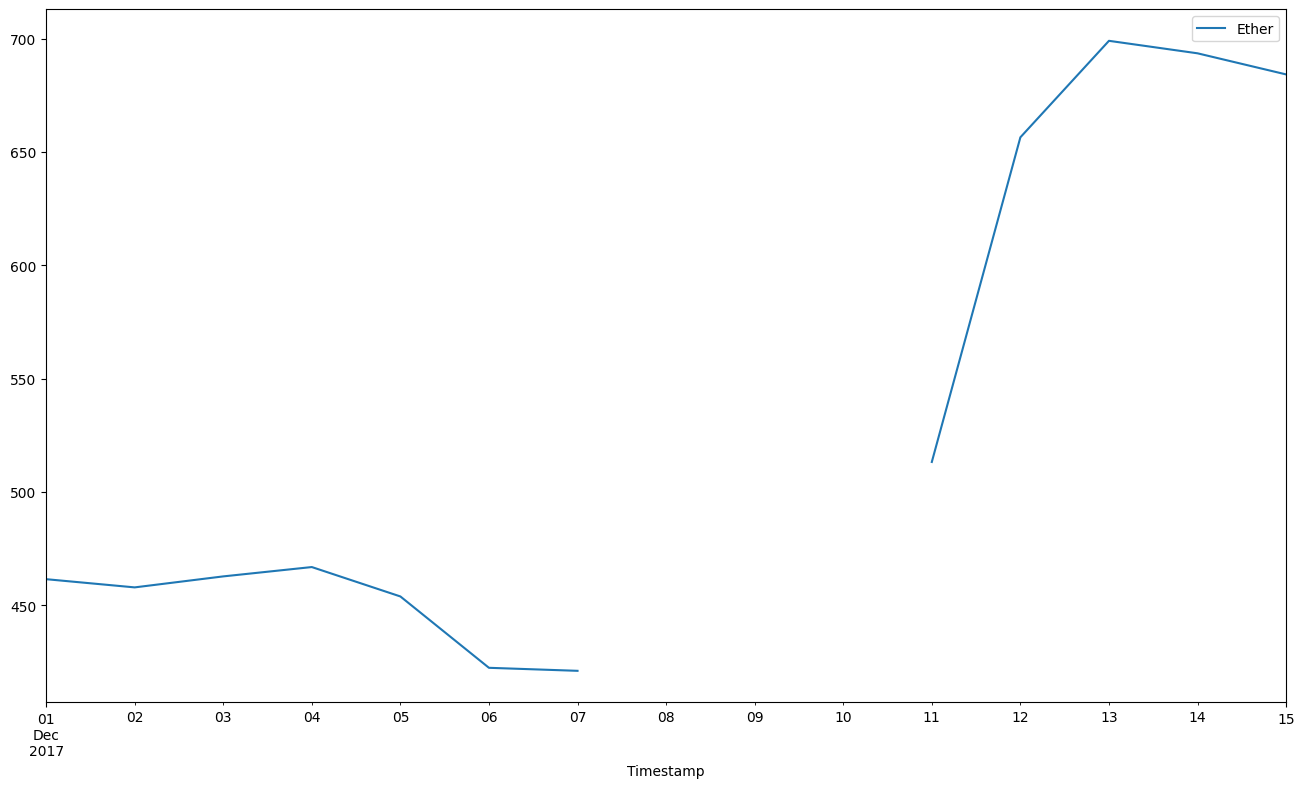

In [6]:
# lets zoom that part 
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [7]:
# now marking this part of nan value 
df_na = df.loc['2017-12': '2017-12-15']

In [8]:
df_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


<Axes: xlabel='Timestamp'>

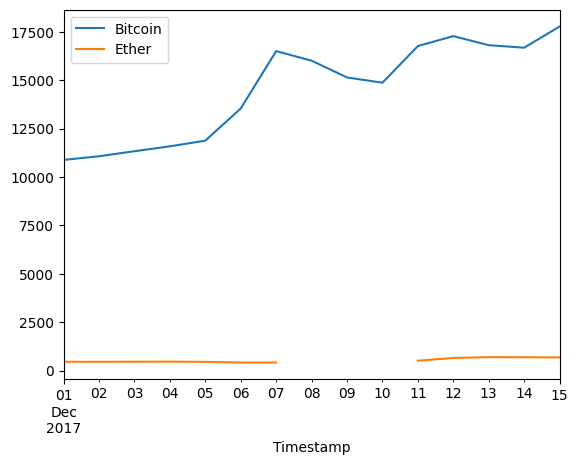

In [9]:
df_na.plot()

Are those null values?

In [10]:
# now checking whether the dataset contains nan values
df_na['Ether'].isna().values.any()
# .values converts the DataFrame to a NumPy array (removes labels/index).

True

When? what periods of time?

In [11]:
df_na.loc[df["Ether"].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


Let's add a little bit more context:

In [12]:
df_na.loc["2017-12-06":"2017-12-12"]

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

In [13]:
# here we used the bfill method to fill the nan values
df_na.loc["2017-12-06":"2017-12-12"].fillna(method = "bfill")

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [14]:
# here we are now changing the original df and filling nan values with bfill method
df.fillna(method = "bfill", inplace = True)

Let's take a look now:

<Axes: xlabel='Timestamp'>

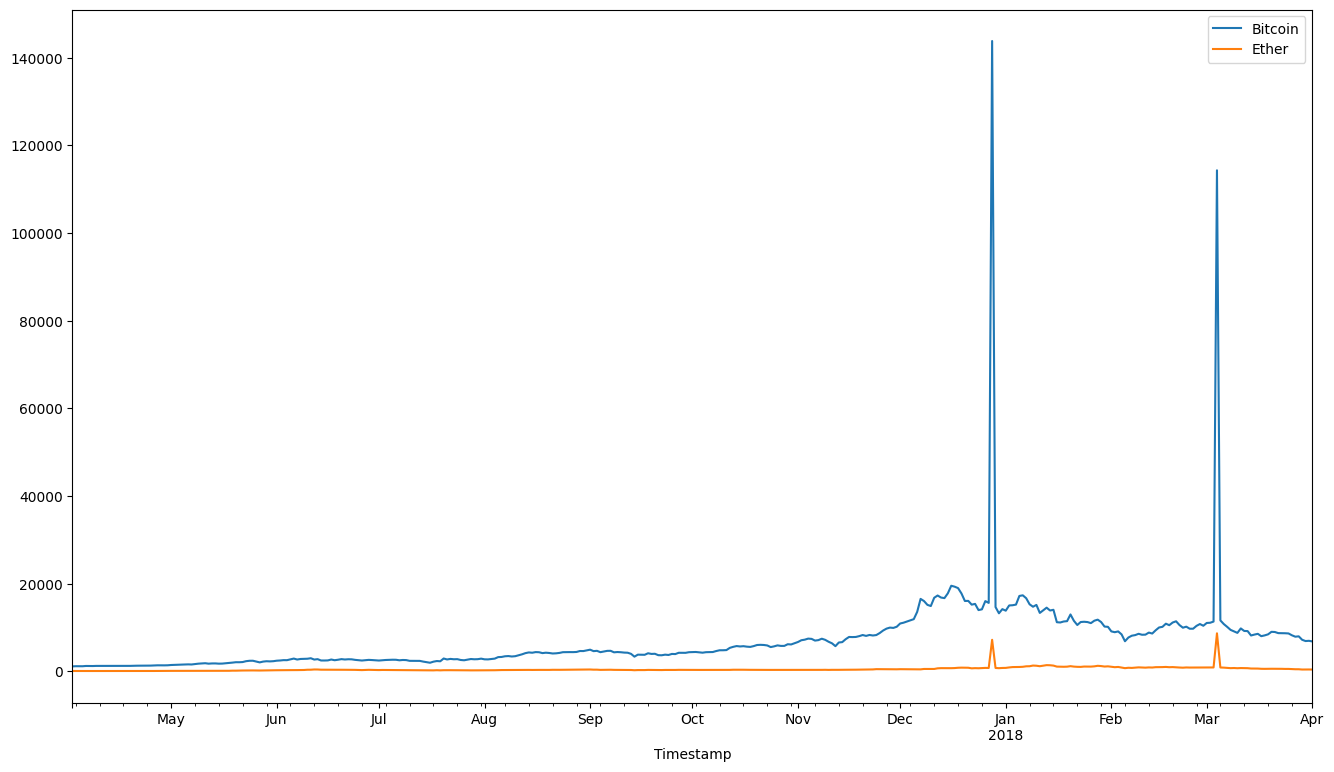

In [15]:
df.plot(figsize = (16, 9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

<Axes: xlabel='Timestamp'>

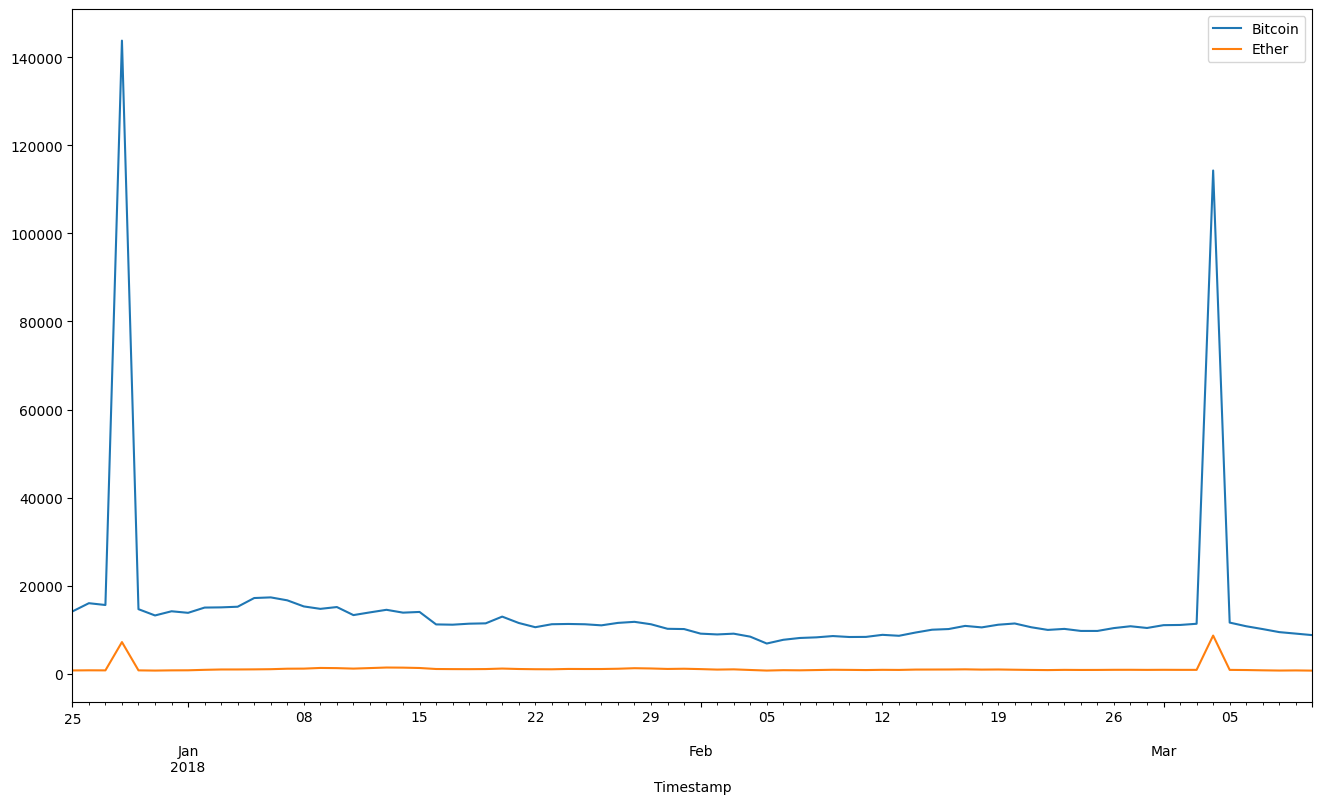

In [16]:
df.loc["2017-12-25":"2018-03-10"].plot(figsize = (16,9))

<Axes: xlabel='Timestamp'>

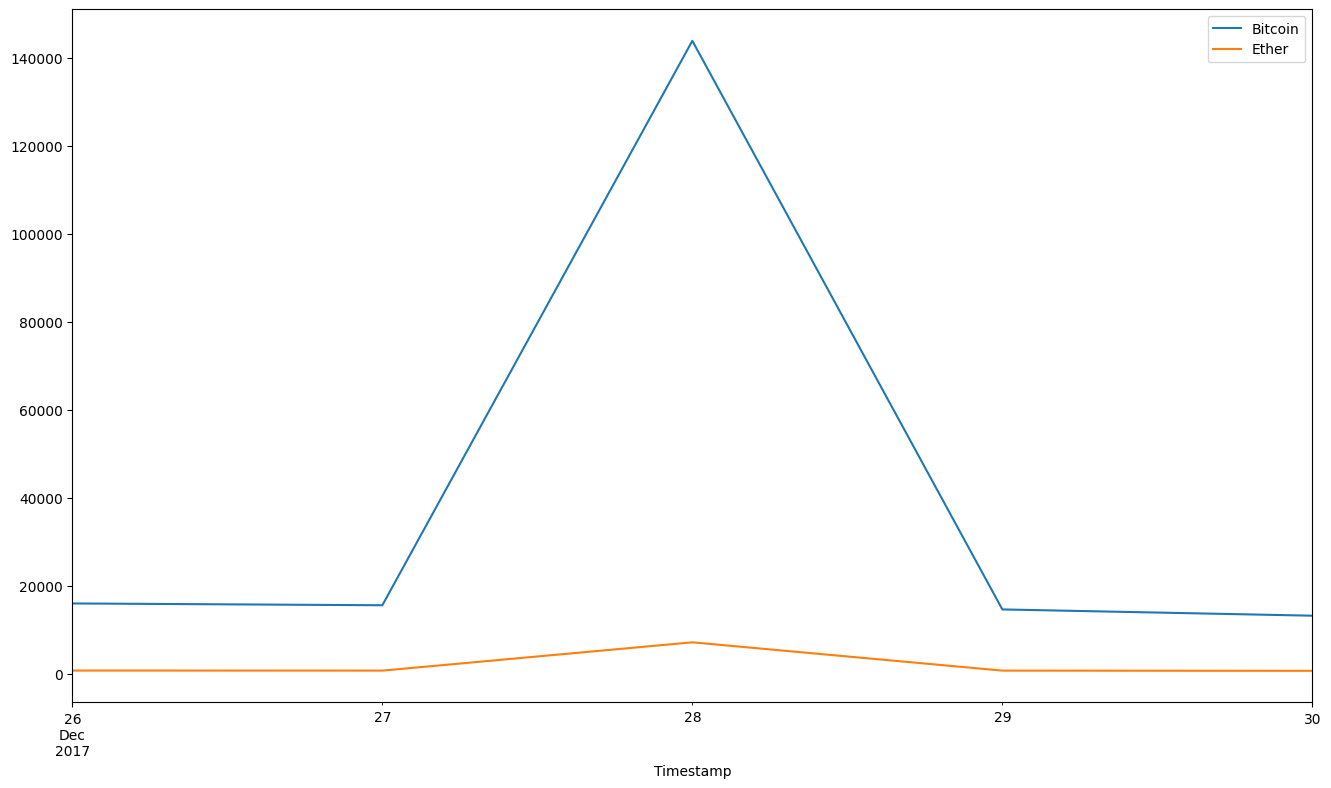

In [17]:
# first analyzing the first peak
df.loc["2017-12-26":"2017-12-30"].plot(figsize = (16,9))

In [18]:
peak1 = df.loc["2017-12-26":"2017-12-30"]
peak1

,Bitcoin,Ether
Timestamp,,
2017-12-26,15999.048333,753.40
2017-12-27,15589.321667,739.94
2017-12-28,143805.816667,7166.90
2017-12-29,14640.140000,739.60
2017-12-30,13215.574000,692.99


<Axes: xlabel='Timestamp'>

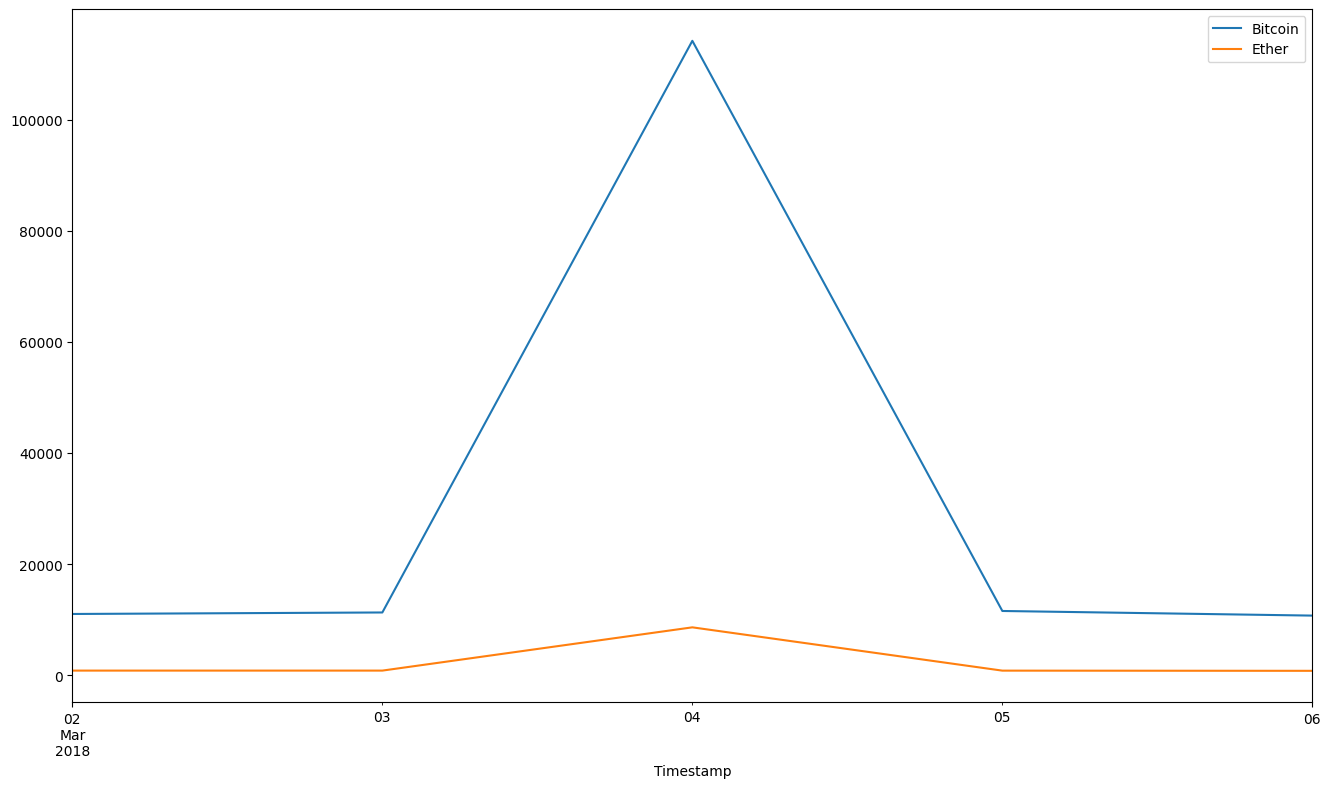

In [19]:
# analyzing the second peak
df['2018-03-02': '2018-03-06'].plot(figsize = (16,9))

In [20]:
peak2 = df['2018-03-02': '2018-03-06']
peak2

,Bitcoin,Ether
Timestamp,,
2018-03-02,11055.815000,855.60
2018-03-03,11326.948333,855.65
2018-03-04,114301.816667,8648.30
2018-03-05,11595.540000,849.42
2018-03-06,10763.198333,815.69


So from these analysis we can infer that :   
#### THE GRAPH PEAKED ON : **2017-12-28** and **2018-03-04**

In [25]:
# now we need to confirm whether we should drop the values or correct the values
df["2017-12-26":"2017-12-30"].describe()

,Bitcoin,Ether
count,5.000000,5.000000
mean,40649.980133,2018.566000
std,57675.796648,2878.097383
min,13215.574000,692.990000
25%,14640.140000,739.600000
50%,15589.321667,739.940000
75%,15999.048333,753.400000
max,143805.816667,7166.900000


In the .describe we see that all the values i.e. mean, std, min ... 75% has values in the same place values. But the max value of both bitcoin and ether are way larger than the rest. Now this raises a concern.

In [24]:
df['2018-03-02': '2018-03-06'].describe()

,Bitcoin,Ether
count,5.000000,5.000000
mean,31808.663667,2404.932000
std,46116.113404,3490.188249
min,10763.198333,815.690000
25%,11055.815000,849.420000
50%,11326.948333,855.600000
75%,11595.540000,855.650000
max,114301.816667,8648.300000


In the .describe we see that all the values i.e. mean, std, min ... 75% has values in the same place values. But the max value of both bitcoin and ether are way larger than the rest. Now this raises a concern.  
**We hence need to confirm whether those values are abnormally normal or absolutely incorrect**

**We will be using box plot to finalize whether to correct or drop the values**  
##### According to boxplot : 
- if outliers(small circles) lies beyond the whiskers(T shaped upper and lower)
- Then those outliers are considered incorrect values hence need to be dropped

<Axes: >

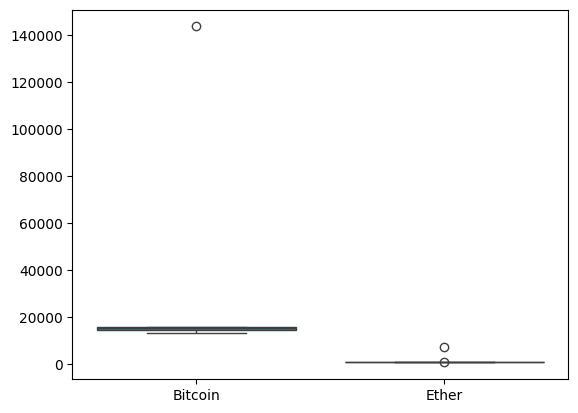

In [26]:
sns.boxplot(df["2017-12-26":"2017-12-30"])

<Axes: >

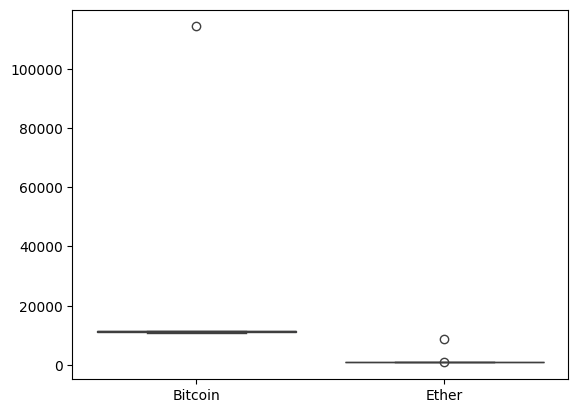

In [22]:
sns.boxplot(df['2018-03-02': '2018-03-06'])

[![Boxplot Explained - YouTube Video](https://img.youtube.com/vi/INSIyaZUXIY/0.jpg)](https://youtu.be/INSIyaZUXIY?si=C5gy3IdGVjAj7Arq)

here we see 1 value for Bitcoin and another 2 for Ether that are outliers

<Axes: >

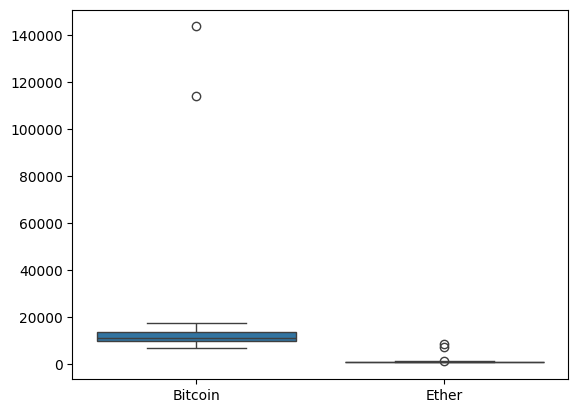

In [29]:
sns.boxplot(df["2017-12-26":"2018-03-06"])

In [30]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Return the outlier rows
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
ether_outliers = detect_outliers(df, 'Ether')
bitcoin_outliers = detect_outliers(df, 'Bitcoin')

# Print them
print("📊 Ether Outliers Detected:")
print(ether_outliers)

print("\n📈 Bitcoin Outliers Detected:")
print(bitcoin_outliers)

📊 Ether Outliers Detected:
                  Bitcoin    Ether
Timestamp                         
2017-12-28  143805.816667  7166.90
2018-01-09   14714.253333  1289.24
2018-01-13   14499.773333  1385.02
2018-01-14   13852.920000  1359.48
2018-03-04  114301.816667  8648.30

📈 Bitcoin Outliers Detected:
                  Bitcoin    Ether
Timestamp                         
2017-12-16   19498.683333   692.83
2017-12-17   19289.785000   717.71
2017-12-28  143805.816667  7166.90
2018-03-04  114301.816667  8648.30


**So here we have successfully identified outliers on 2 dates :**  
- on 2017-12-28 both Bitcoin and Ether
- on 2018-03-04 both Bitcoin and Ether

#### Dropping the outliers

In [31]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<Axes: xlabel='Timestamp'>

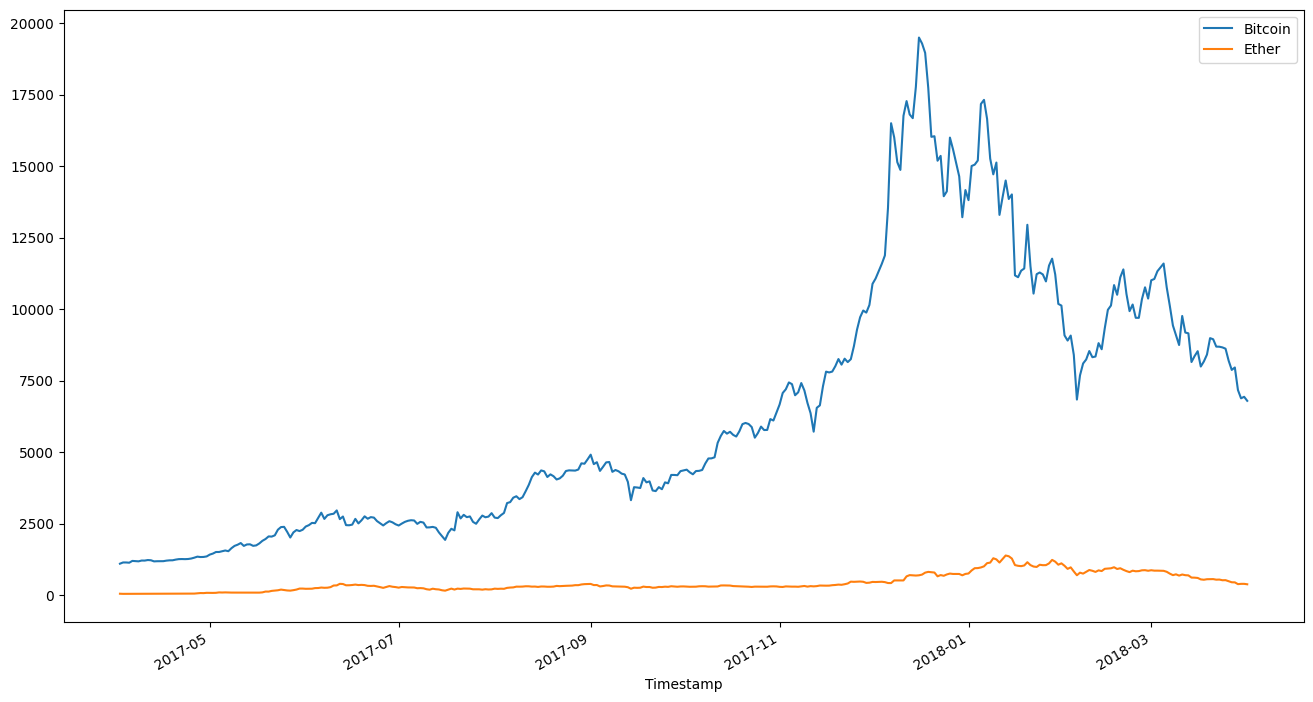

In [32]:
# plotting the cleaned data
df_cleaned.plot(figsize=(16, 9))

Now it looks much better. Our data seems to be clean.

### Cleaning Analysis

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

**Skewness tells you the direction and degree of asymmetry in your data distribution.**  
It helps answer the question:  
“Is my data balanced, or is it leaning heavily toward one side?”

### Central Tendency

We'll use a set of common indicators of to measure central tendency and identify these outliers:

**Central tendency refers to the measure that represents the center or typical value of a dataset.**  
It helps answer the question:  
"What is a typical or average value in this data?"

**mean**  
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [33]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem too high. That's because the outliers are skewing with the mean:

In [35]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

**median**  
The median is the middle value of a sorted dataset.  
It tells you the point at which 50% of the data lies below and 50% lies above. It’s not influenced by outliers

In [36]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [37]:
df_cleaned.median()

Bitcoin    4580.38748
Ether       309.32000
dtype: float64

**mode**   
The mode is the value that appears most frequently in a dataset.  
It answers the question:  
"What value shows up the most?"

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with df.mode().

### Visualizing distribution

Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms**:

<Axes: ylabel='Frequency'>

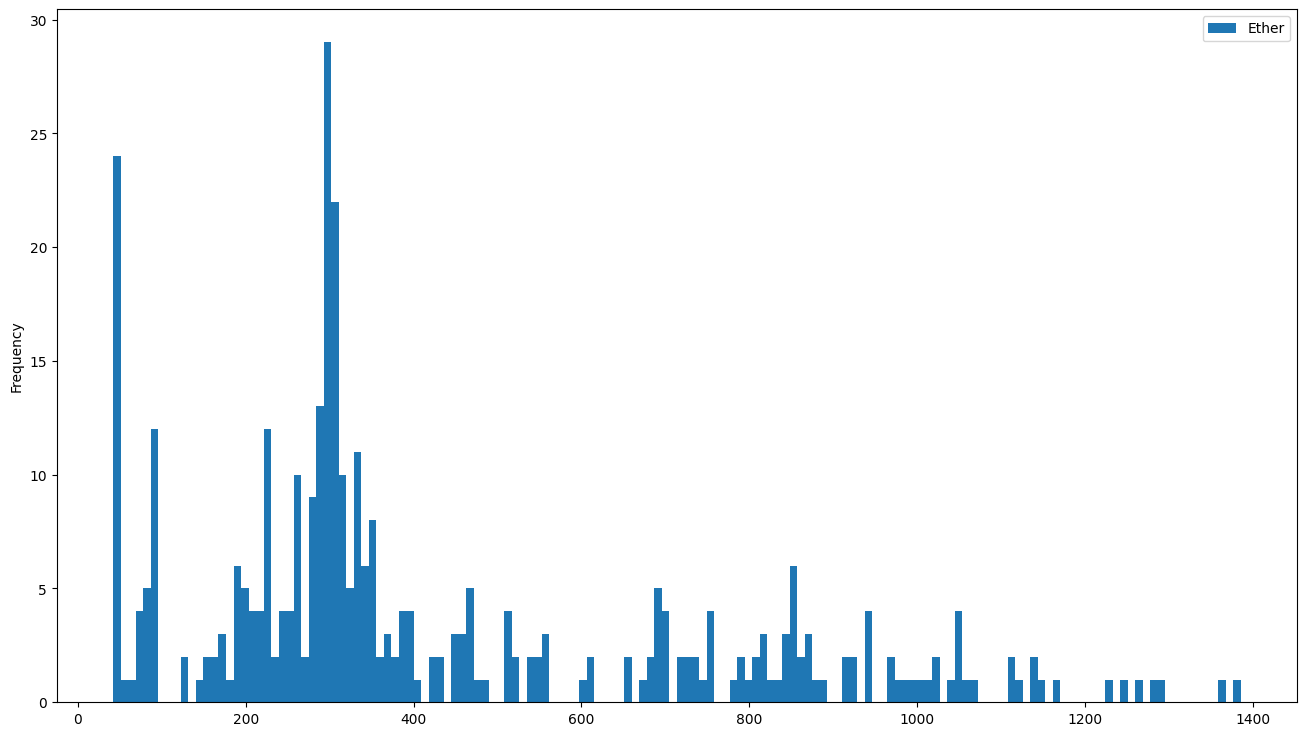

In [43]:
df_cleaned.plot(kind='hist', y='Ether', bins=150, figsize = (16, 9))

**bins** defines how many intervals (or “buckets”) the data will be split into when creating a histogram.

<Axes: ylabel='Frequency'>

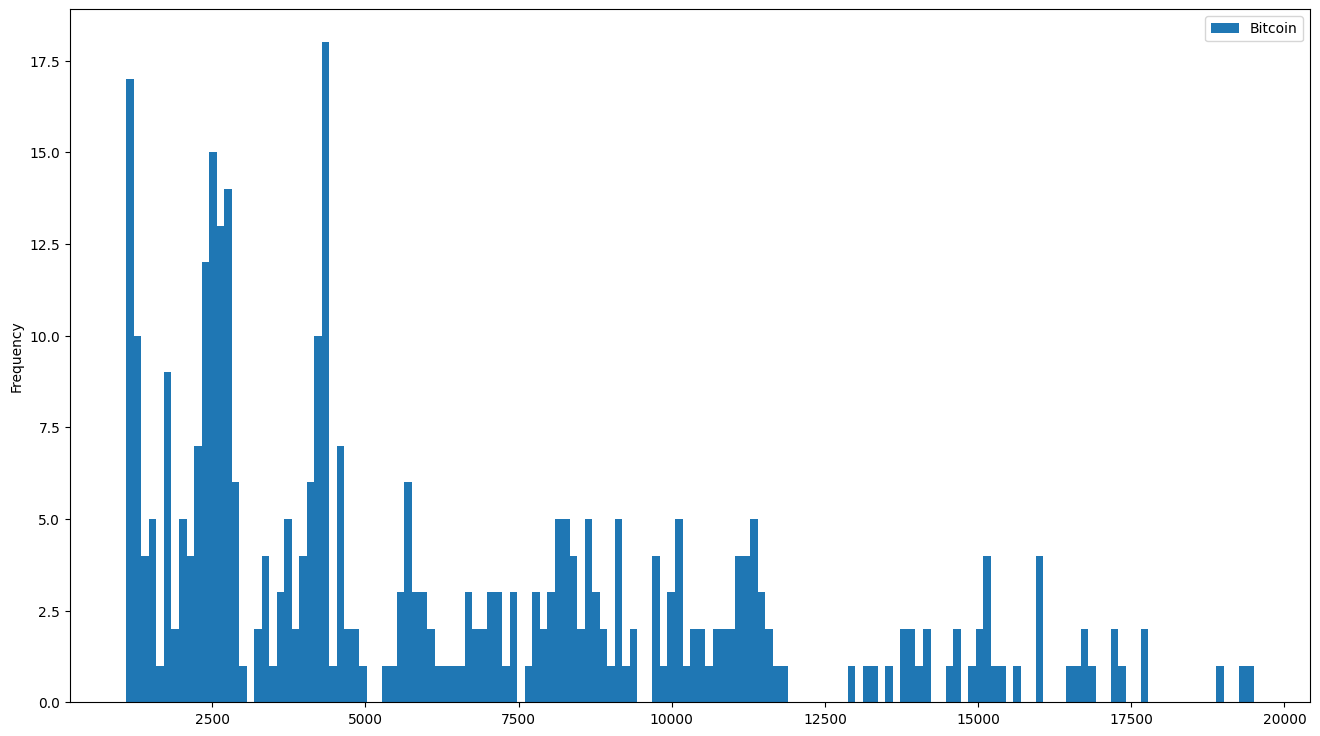

In [44]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150, figsize = (16, 9))

Using seaborn:

<Axes: xlabel='Ether', ylabel='Count'>

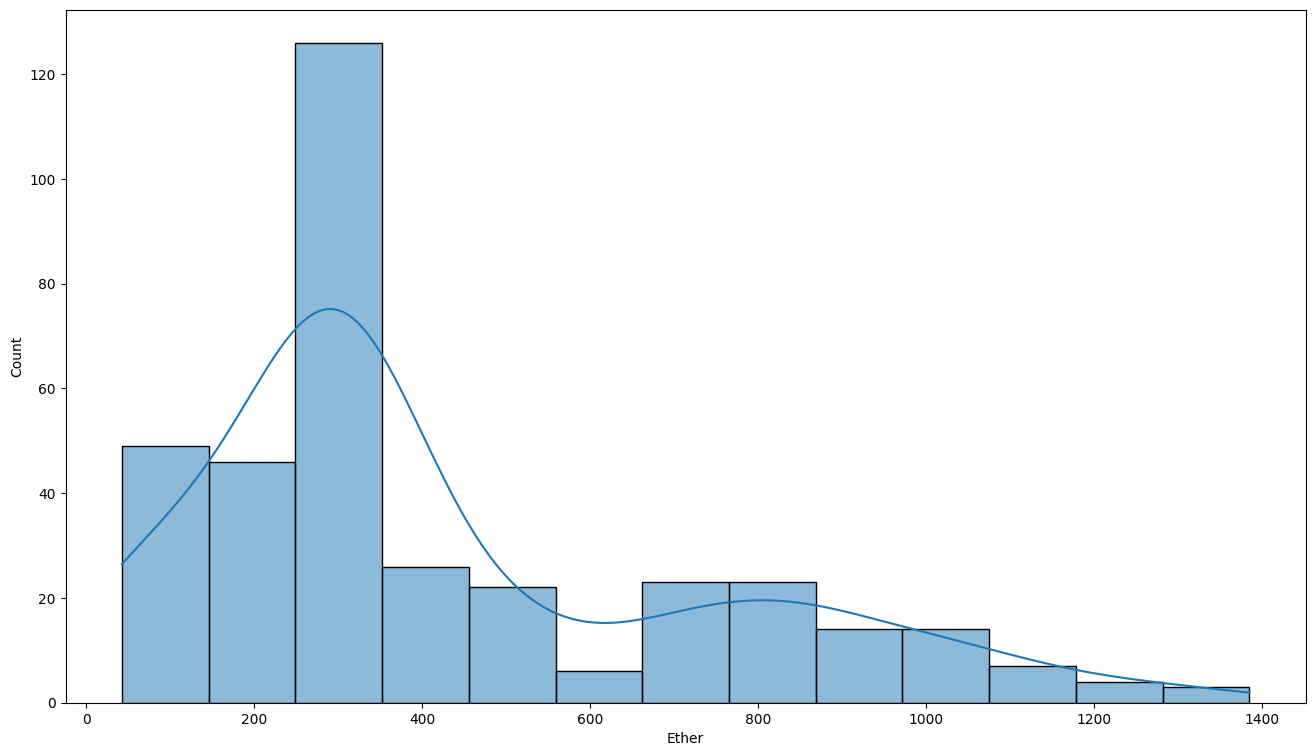

In [51]:
fig, ax = plt.subplots(figsize = (16,9))
sns.histplot(df_cleaned["Ether"], ax = ax, kde = True)

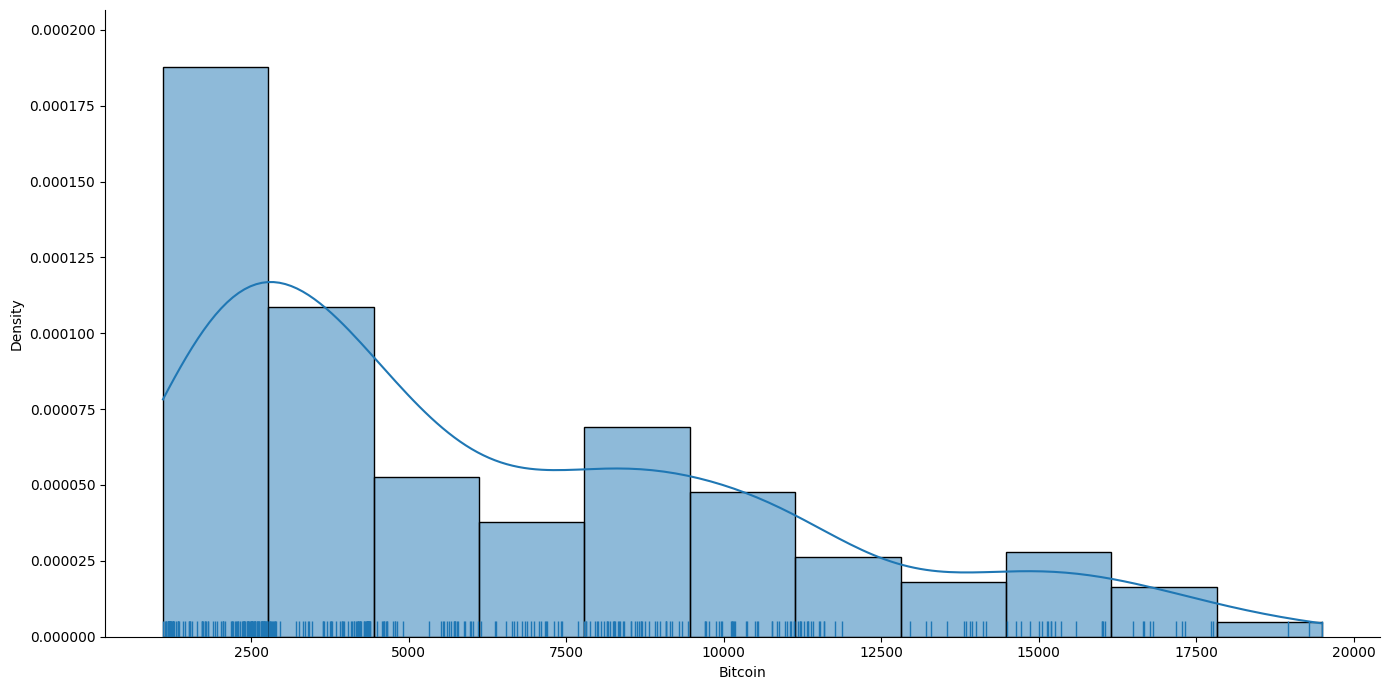

In [73]:
sns.displot(
    data=df_cleaned,
    x='Bitcoin',
    kde=True,
    rug=True,
    stat = "density",
    height=7,
    aspect=2
)

Seaborn's displot is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

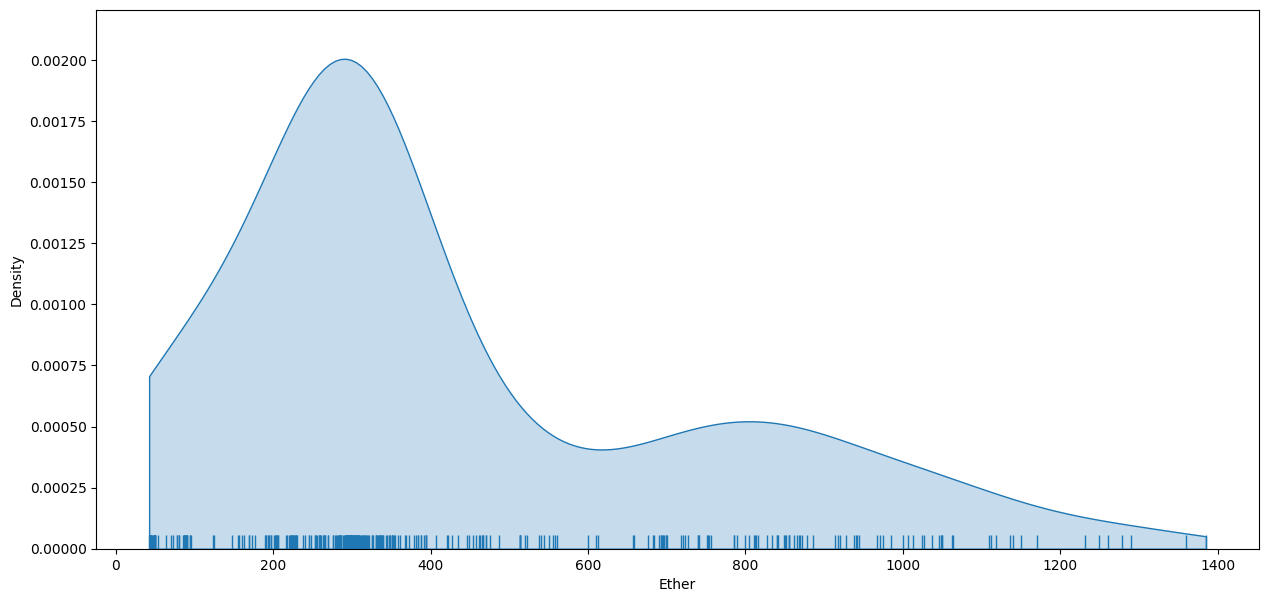

In [75]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], fill=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

We can also visualize a cumulative plot of our distribution:

<Axes: xlabel='Bitcoin', ylabel='Density'>

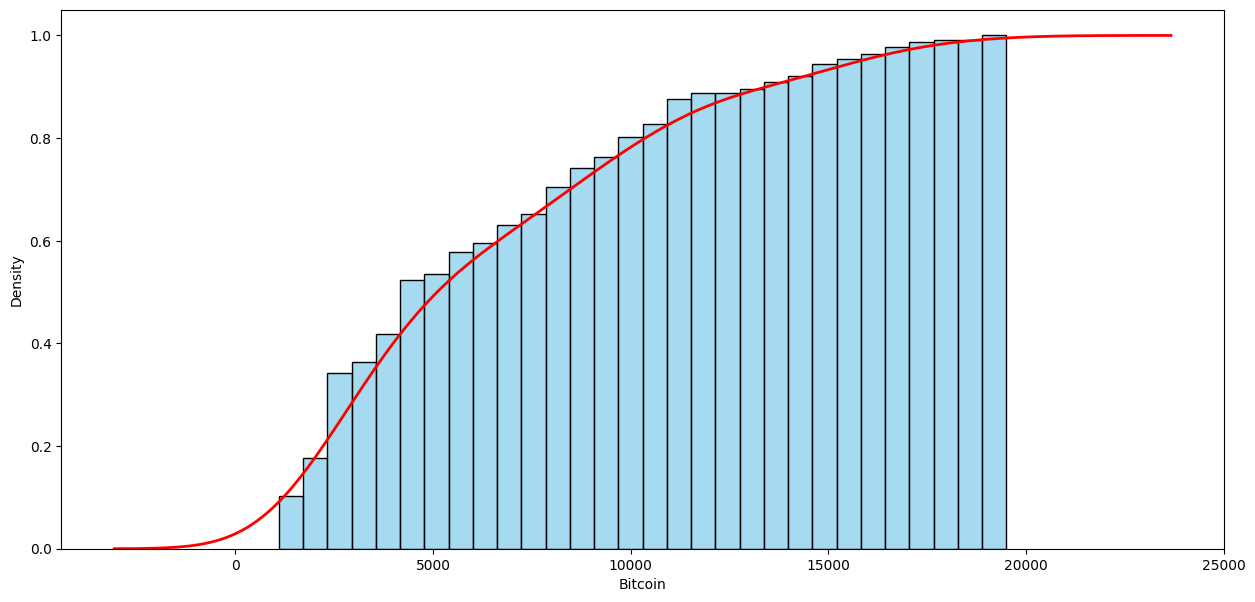

In [81]:
fig, ax = plt.subplots(figsize=(15, 7))

# Histogram with cumulative distribution
sns.histplot(
    data=df_cleaned,
    x='Bitcoin',
    stat='density',
    cumulative=True,
    kde=False,
    bins=30,
    color='skyblue',
    edgecolor='black',
    ax=ax
)

# KDE with cumulative distribution
sns.kdeplot(
    data=df_cleaned,
    x='Bitcoin',
    cumulative=True,
    color='red',
    linewidth=2,
    ax=ax
)

This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

<Axes: xlabel='Bitcoin', ylabel='Density'>

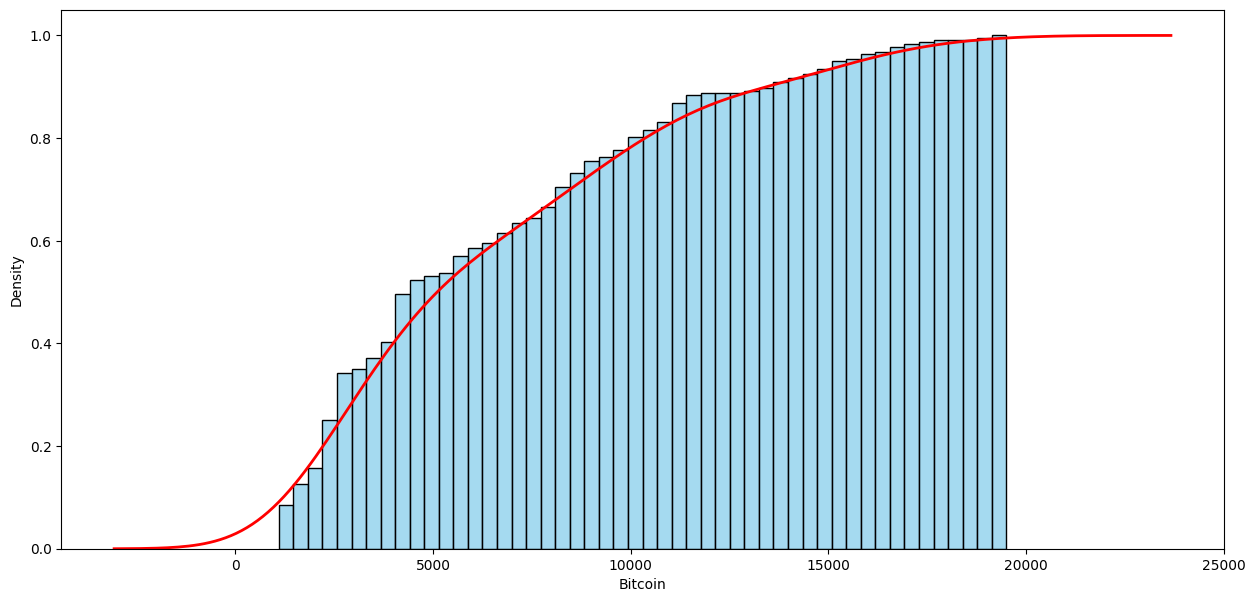

In [82]:
fig, ax = plt.subplots(figsize=(15, 7))

# Histogram with cumulative distribution
sns.histplot(
    data=df_cleaned,
    x='Bitcoin',
    stat='density',
    cumulative=True,
    kde=False,
    bins=50,
    color='skyblue',
    edgecolor='black',
    ax=ax
)

# KDE with cumulative distribution
sns.kdeplot(
    data=df_cleaned,
    x='Bitcoin',
    cumulative=True,
    color='red',
    linewidth=2,
    ax=ax
)

### Visualizing bivariate distributions

The most common way to observe a bivariate distribution is a scatterplot, the jointplot will also include the distribution of the variables:

Bivariate visualization refers to plotting or visualizing the relationship between two variables. The goal is to understand how one variable affects or relates to another.

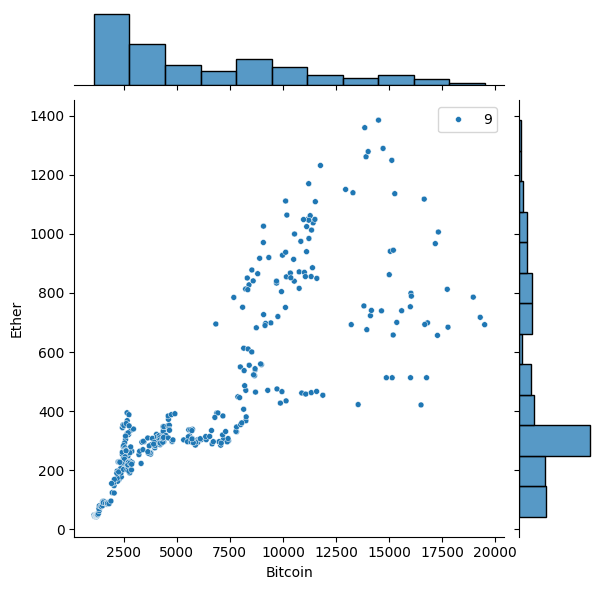

In [83]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

If you want only a scatter plot, you can use the regplot method, that also fits a linear regression model in the plot:

<Axes: xlabel='Bitcoin', ylabel='Ether'>

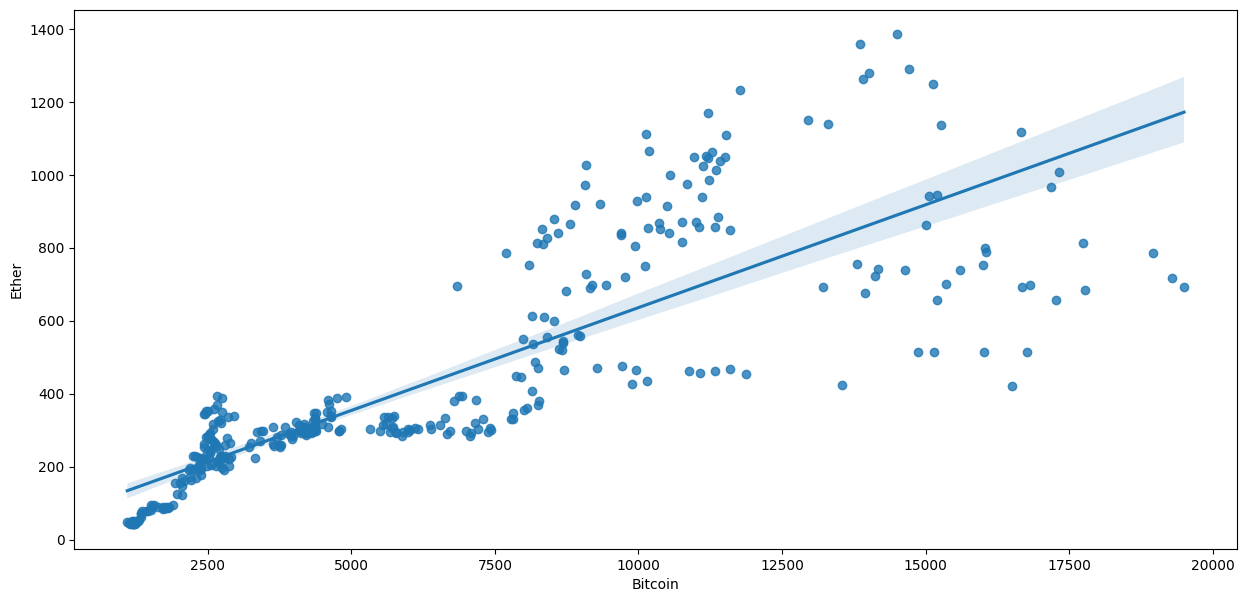

In [84]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

### Quantiles, quartiles and percentiles

In [85]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

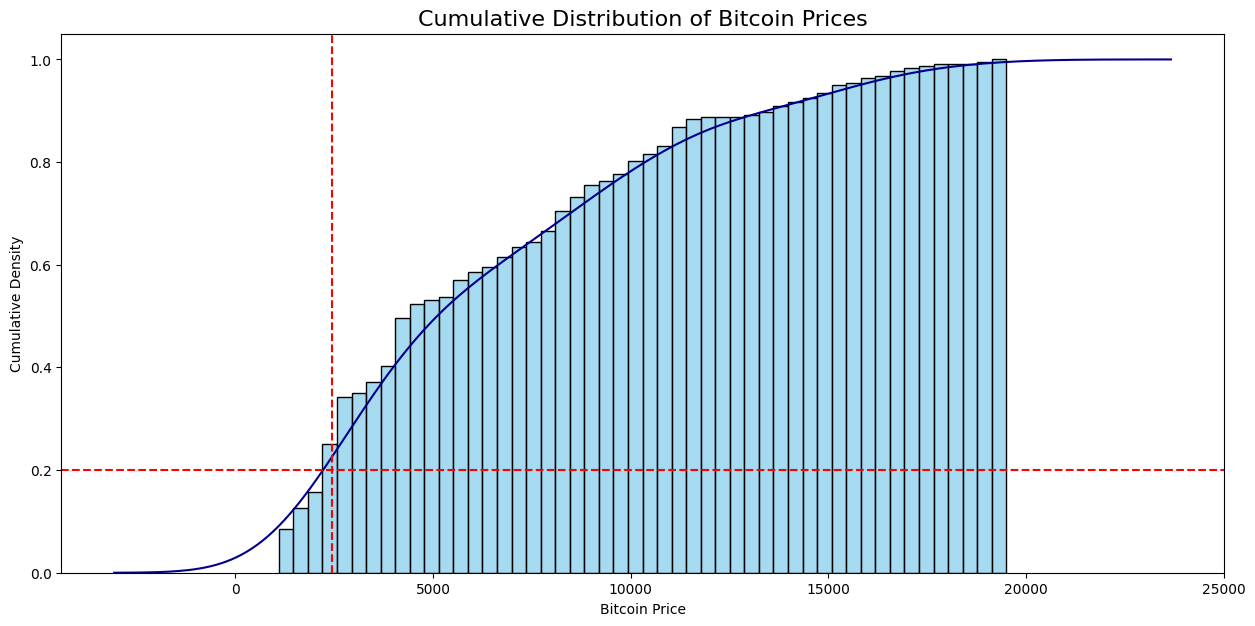

In [87]:
fig, ax = plt.subplots(figsize=(15, 7))

# Plot cumulative histogram
sns.histplot(df_cleaned['Bitcoin'], bins=50, stat='density', cumulative=True,
             kde=False, color='skyblue', edgecolor='black', ax=ax)

# Plot cumulative KDE
sns.kdeplot(df_cleaned['Bitcoin'], cumulative=True, color='darkblue', ax=ax)

# Add horizontal and vertical reference lines
ax.axhline(0.2, color='red', linestyle='--')
ax.axvline(df_cleaned['Bitcoin'].quantile(0.2), color='red', linestyle='--')

# Labels and title
ax.set_title('Cumulative Distribution of Bitcoin Prices', fontsize=16)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Cumulative Density')

plt.show()

In [88]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [89]:
df_cleaned['Bitcoin'].median()

4580.387479999999

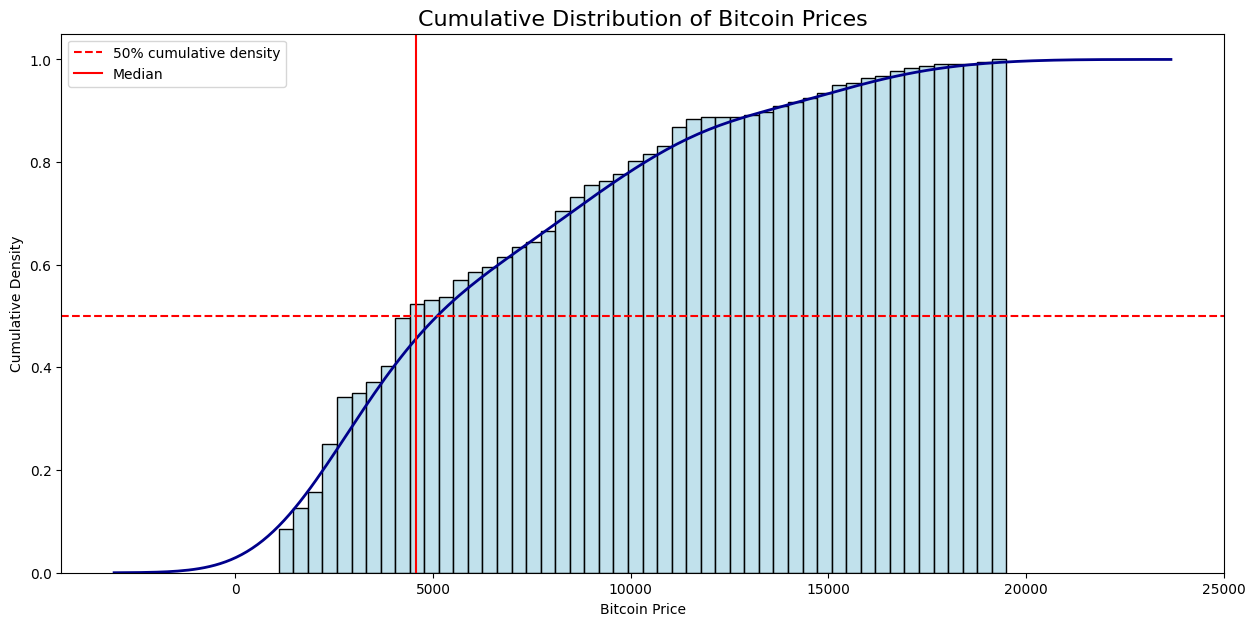

In [112]:
fig, ax = plt.subplots(figsize=(15, 7))

# Cumulative histogram
sns.histplot(df_cleaned['Bitcoin'], bins=50, stat='density',
             cumulative=True, kde=False,
             color='lightblue', edgecolor='black', ax=ax)

# Cumulative KDE
sns.kdeplot(df_cleaned['Bitcoin'], cumulative=True,
            color='darkblue', linewidth=2, ax=ax)

# Median lines
ax.axhline(0.5, color='red', linestyle='--', label='50% cumulative density')
ax.axvline(df_cleaned['Bitcoin'].quantile(0.5), color='red', linestyle='-', label='Median')

# Title and labels
ax.set_title('Cumulative Distribution of Bitcoin Prices', fontsize=16)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Cumulative Density')
ax.legend()

plt.show()

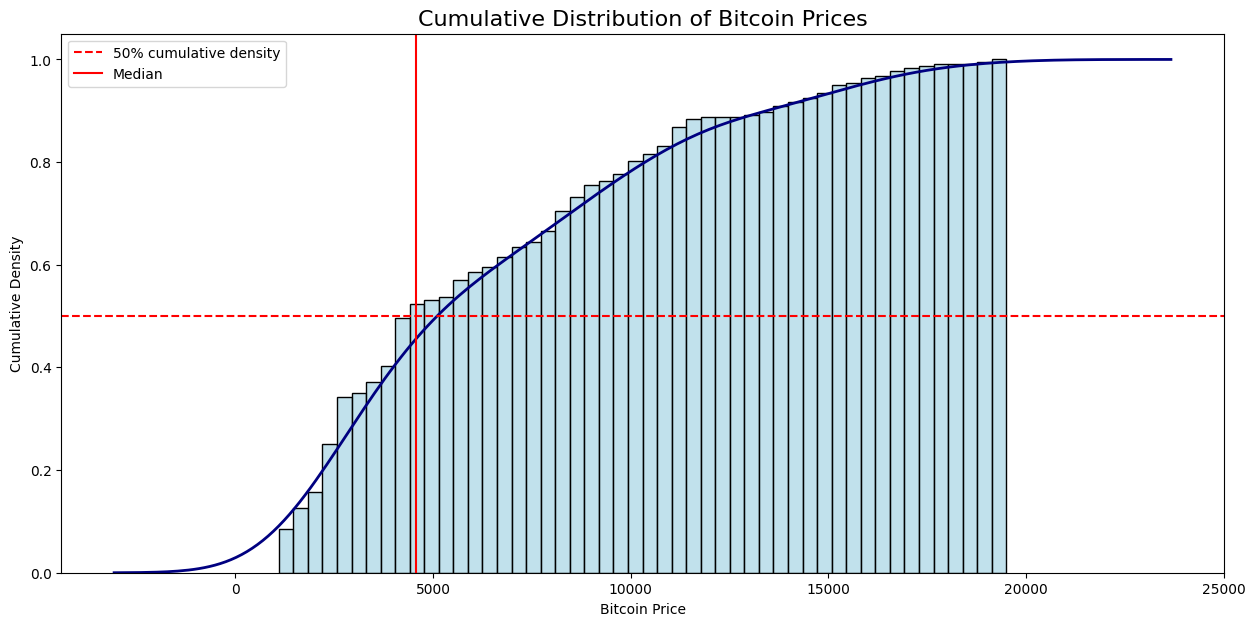

In [117]:
fig, ax = plt.subplots(figsize=(15, 7))

# Plot cumulative histogram
sns.histplot(
    df_cleaned['Bitcoin'],
    bins=50,
    stat='density',
    cumulative=True,
    kde=False,
    color='lightblue',
    edgecolor='black',
    ax=ax
)

# Plot cumulative KDE
sns.kdeplot(
    df_cleaned['Bitcoin'],
    cumulative=True,
    color='navy',
    linewidth=2,
    ax=ax
)

# Add horizontal line at 0.5 and vertical line at the median
ax.axhline(0.5, color='red', linestyle='--', label='50% cumulative density')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red', linestyle='-', label='Median')

# Labels and title
ax.set_title('Cumulative Distribution of Bitcoin Prices', fontsize=16)
ax.set_xlabel('Bitcoin Price')
ax.set_ylabel('Cumulative Density')
ax.legend()

plt.show()

Quantile 0.25 == Percentile 25% == Quartile 1st

### Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well known:  
- Range
- Variance and Standard Deviation
- IQR

### Range

Range is fairly simple to understand, it's just the max - min values:

In [93]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is really sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [94]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

### Variance and Standard Deviation

In [95]:
df['Bitcoin'].var()

103766537.75278121

Variance is a measure of how spread out the values in a dataset are.  
- Mathematically, it's the average of the squared deviations from the mean.
- It tells you how much the data varies around the average (mean) value.

In [96]:
df['Bitcoin'].std()

10186.586167739475

Standard Deviation (std) is a measure of how spread out the values are around the mean.
It’s the square root of the variance.

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:

In [97]:
df_cleaned['Bitcoin'].std()

4513.757662530282

### IQR

The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [98]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [99]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

### Analytical Analysis of invalid values

We can now use the measurements we've seen to analyze those values that seem invalid.

#### Using std: Z scores

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [101]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [102]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


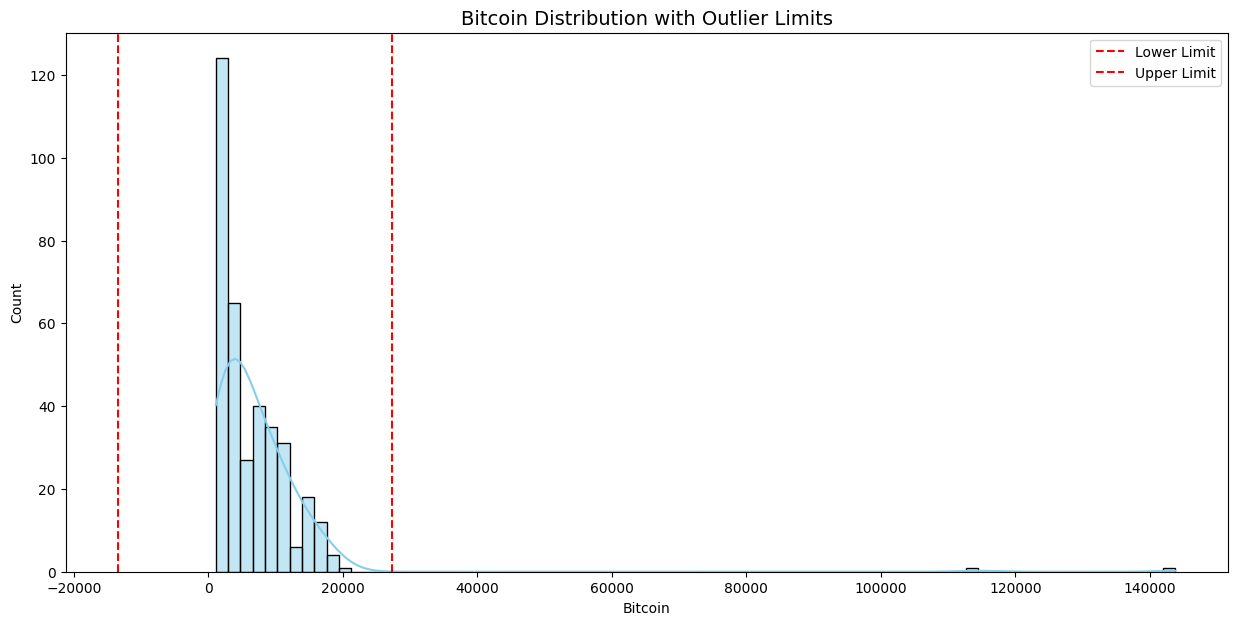

In [103]:
fig, ax = plt.subplots(figsize=(15, 7))

# Replace distplot with histplot + kde
sns.histplot(df['Bitcoin'], ax=ax, kde=True, color='skyblue')

# Add vertical lines for outlier bounds
ax.axvline(lower_limit, color='red', linestyle='--', label='Lower Limit')
ax.axvline(upper_limit, color='red', linestyle='--', label='Upper Limit')

ax.set_title("Bitcoin Distribution with Outlier Limits", fontsize=14)
ax.legend()


Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above $27,369 is considered to be an invalid value. Pretty accurate.

#### Using IQRs

We can use the IQR instead of std if we think that the standard deviation might be too affected by the outliers/invalid values.  
NOTE that : 
- here we are just using the same principle as the boxplot for finding the upper and lower limit

**Compute IQR:**
- IQR=Q3−Q1

**Find bounds:**
- Lower bound:
  - Q1−1.5×IQR
- Upper bound: 
  - Q3+1.5×IQR

**Outliers:**
- Any data point outside these bounds is considered an outlier.

In [104]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [105]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [107]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


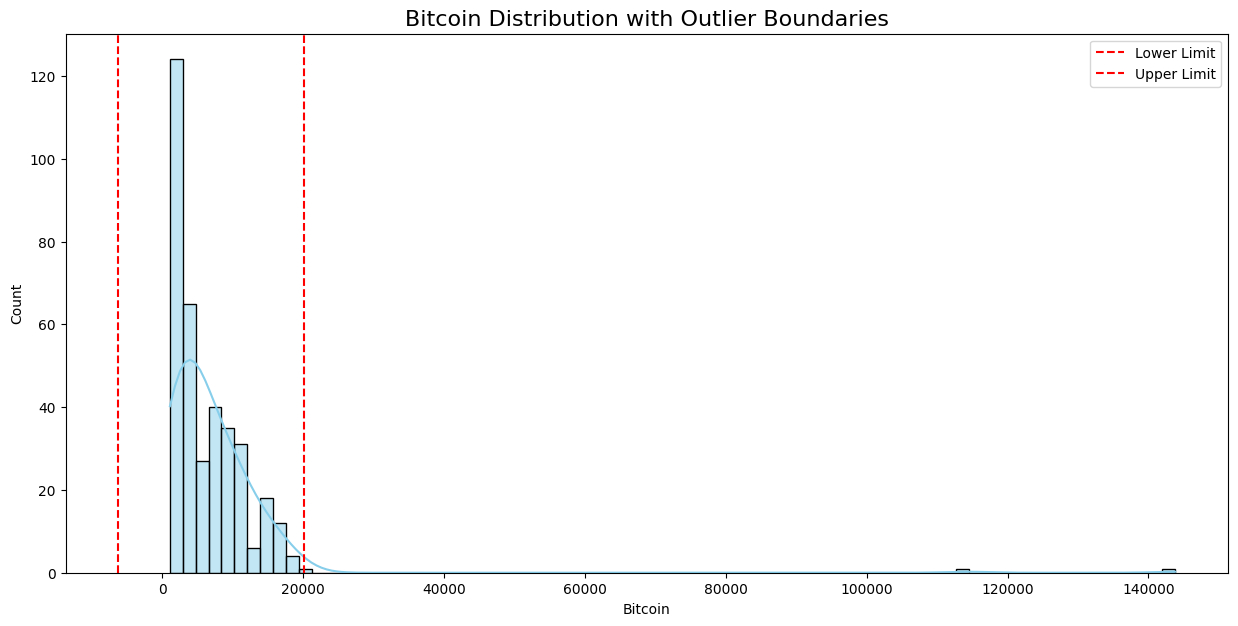

In [108]:

fig, ax = plt.subplots(figsize=(15, 7))

# Recommended replacement for distplot
sns.histplot(df['Bitcoin'], kde=True, ax=ax, color='skyblue')

# Add vertical lines to mark outlier boundaries
ax.axvline(lower_limit, color='red', linestyle='--', label='Lower Limit')
ax.axvline(upper_limit, color='red', linestyle='--', label='Upper Limit')

# Add title and legend
ax.set_title('Bitcoin Distribution with Outlier Boundaries', fontsize=16)
ax.legend()

plt.show()

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

### Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [109]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

<Axes: xlabel='Timestamp'>

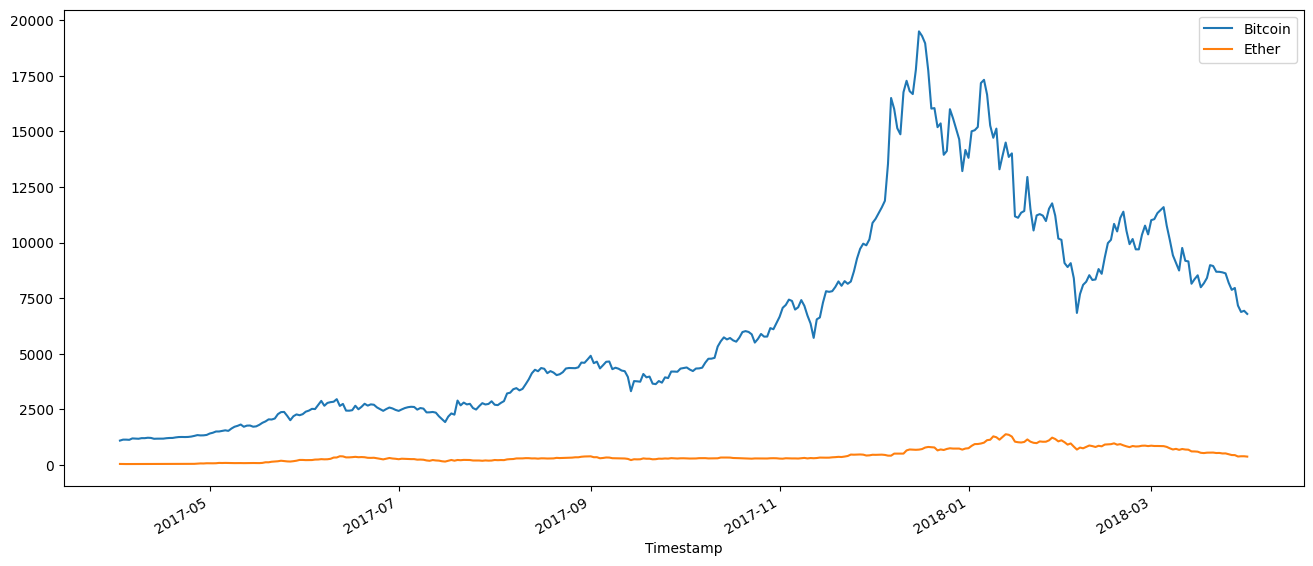

In [110]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<Axes: xlabel='Timestamp'>

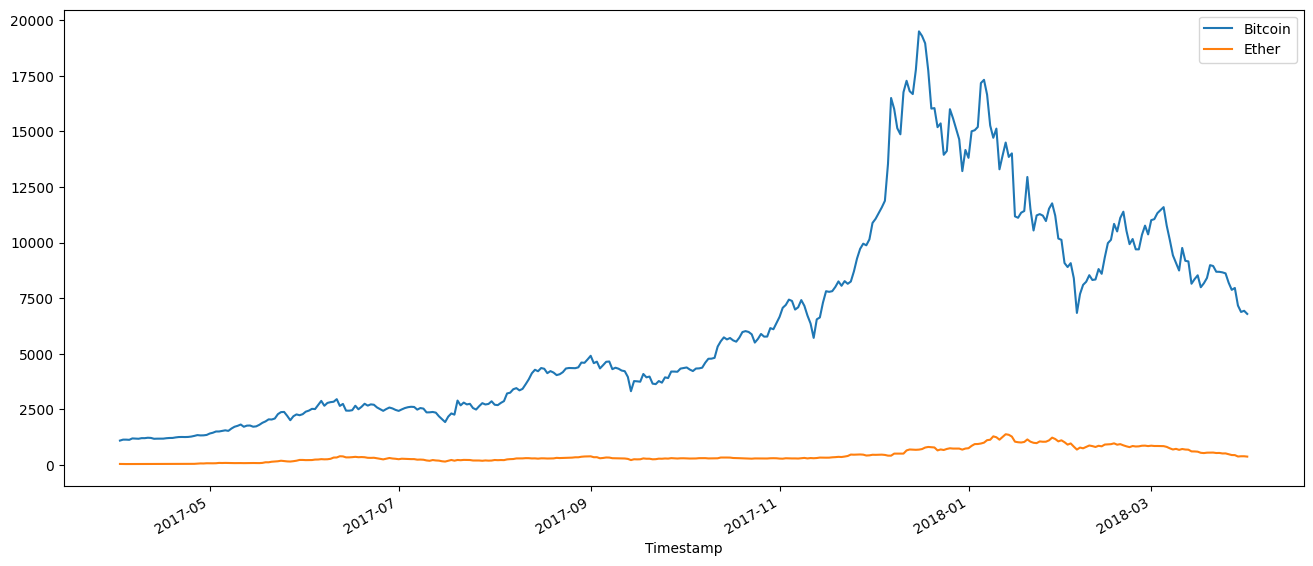

In [111]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))

**📌 "Being sensitive to outliers" means:**  
A statistic (like mean, range, variance, etc.) is said to be sensitive to outliers if a few extreme values can significantly distort or change its result.

**🎯 Why does it matter?**  

If you're using statistics like:

- **Mean**
- **Range** (max - min)
- **Variance** or **Standard Deviation**

These can **overreact to just one weird value**, making your analysis misleading.

---

So, in data analysis, we often prefer **robust metrics** like:

- **Median**
- **Interquartile Range (IQR)**
- **Boxplots**
- **Z-score** or **IQR-based filtering** for outlier detection

---

### 📌 What Is the Use of Skewness?

**Skewness** is a statistical measure that helps you understand:

- The shape of your data distribution.  
- Whether **extreme values** (outliers) are affecting your data.  
- If your data is **symmetric** or **leans toward one side** (left or right).  

---

### 📈 Is Skewness Good or Bad?

It depends on your goal:

#### ✅ Skewness is not inherently bad
- In real-world data (like sales, income, or website visits), skewness is **common and natural**.
- But it **matters** when you're:
  - Using statistical models that assume **normality** (like linear regression, logistic regression).
  - Interpreting measures like **mean**, which can be misleading in skewed data.

#### 🚫 Skewness can be problematic when:
- You're relying on statistical assumptions that **require symmetric distributions**.
- The skewness is **extreme**, distorting your insights or model performance.

---

### 🛠️ What Should You Do If You Detect Skewness?

#### 1. **Leave it** (if it's not harming your analysis)
- If you're using **non-parametric methods** (like median, IQR, decision trees), skewness often doesn't hurt.

#### 2. **Use Robust Statistics**
- Instead of **mean** → use **median**.  
- Instead of **standard deviation** → use **IQR**.  
- Use **boxplots**, **Z-score**, or **IQR filtering** to detect/remove outliers.

#### 3. **Transform the Data** (if needed)
To reduce skewness and improve model performance:

- ✅ `np.log(column + 1)` &nbsp; *(add 1 to avoid log(0))*  
- ✅ `np.sqrt(column)`  
- ✅ **Box-Cox Transformation** *(for strictly positive data)*  
- ✅ **Yeo-Johnson Transformation** *(for data that includes zero or negative values)*  

#### 4. **Use Algorithms That Handle Skew Well**
- Tree-based models like **Random Forest** and **XGBoost** don’t require normally distributed data.

---

### 🧠 Final Thought

> **Skewness is a clue** — it tells you about the nature of your data. Whether you act on it or not depends on your goals, the models you're using, and how extreme the skew is.
